In [54]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../") # go to parent directory
import numpy as np 
import matplotlib.pyplot as plt
from pypde import *


N,M = 20,20
shape = (N,M)

def _f(xx,yy,arg=np.pi/2):
    return np.cos(arg*xx)*np.cos(arg*yy)

def _fsol(xx,yy,arg=np.pi/2):
        return np.cos(arg*xx)*np.cos(arg*yy)*-1/arg**2/2
    
def to1d(v):
    assert v.ndim ==2
    return v.flatten()

def to2d(v,shape):
    assert v.ndim == 1
    return np.reshape(v,shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup Field

In [55]:
u = Field(shape,("CD","CD"))
x,y = u.x, u.y
xx,yy = np.meshgrid(x,y,indexing="ij")

f = Field(shape,("CH","CH"))
f.v = _f(xx,yy)
f.forward()

fhat = to1d(f.vhat)

sol = _fsol(xx,yy)

## Matrices

In [83]:
from pypde.bases import *

# --- Matrices ----
Sx = u.xs[0].S
Bx = u.xs[0].family.B(2,2)
Ix = u.xs[0].family.I(2)
Ax = Ix@Sx

Sy = u.xs[1].S
By = u.xs[1].family.B(2,2)
Iy = u.xs[1].family.I(2)
Ay = Iy@Sy

Sy.shape
Iy.shape
(Ix@Sy).shape

(18, 18)

In [93]:
A = np.kron(Ax,By@Sy) + np.kron(Bx@Sx,Ay)
B = np.kron(Bx,By)

In [94]:
uhat = np.linalg.solve(A,B@fhat)

In [95]:
u.vhat = to2d(uhat,u.vhat.shape)
u.backward()

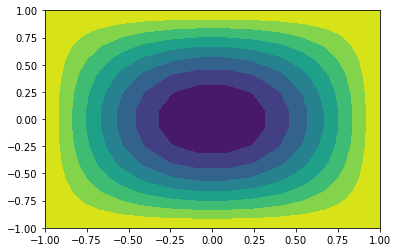

-0.1992517740855542


In [97]:
plt.contourf(xx,yy,u.v)
plt.show()
print(u.v.min())

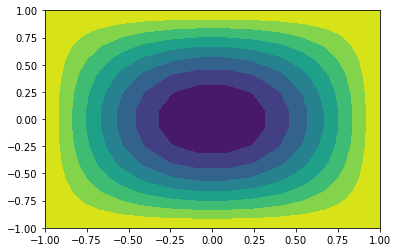

-0.19925177408555428


In [98]:
plt.contourf(xx,yy,sol)
plt.show()
print(sol.min())